In [1]:
%load_ext autoreload
%autoreload 2
from spectraltree import *

In [2]:
import numpy as np
import dendropy

In [3]:
jc = Jukes_Cantor()
tree = balanced_binary(2**5, edge_length=jc.p2t(0.85))
observations = simulate_sequences(1_000, tree, jc)

In [4]:
distance_matrix = JC_distance_matrix(observations)
recovered_tree = estimate_tree_topology(distance_matrix)

In [5]:
print(recovered_tree.as_ascii_plot())

/--------------------------------------------------------------------------- 2 
|                                                                              
|--------------------------------------------------------------------------- 3 
|                                                                              
|                                                                 /--------- 0 
|        /--------------------------------------------------------+            
|        |                                                        \--------- 1 
|        |                                                                     
+        |                                                        /--------- 6 
|        |                                               /--------+            
|        |                                               |        \--------- 7 
|        |         /-------------------------------------+                     
|        |         |                    

In [94]:
jc = Jukes_Cantor()

In [97]:
ttt = 4.
0.25 + 0.75 * np.exp(-4.*ttt/3.)

0.2536209624953736

In [101]:
jc.pmatrix(1)

array([[0.44769785, 0.18410072, 0.18410072, 0.18410072],
       [0.18410072, 0.44769785, 0.18410072, 0.18410072],
       [0.18410072, 0.18410072, 0.44769785, 0.18410072],
       [0.18410072, 0.18410072, 0.18410072, 0.44769785]])

In [100]:
jc.paralinear_distance(1)

4.0

In [103]:
jc.t2p(3, 2.)

TypeError: unsupported operand type(s) for /: 'float' and 'method'

In [106]:
jc.p2t(jc.t2p(0.03, 2.), 2.)

0.029999999999999964

In [91]:
simulate_sequences(1000, my_tree, my_trans).mean(axis=1)

array([0.42 , 0.392, 0.397, 0.   ])

In [144]:
cvec.append(1.2)

In [131]:
char_matrix[0]

In [107]:
simulate_sequences?

In [121]:
datetime.datetime.now().strftime("results_%m-%d-%Y_%H:%M:%S")

'results_12-31-2019_18:21:20'

In [162]:
from compare_methods import *

In [15]:
resu = load_results("example_run.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'data/example_run.pkl'

In [16]:
binary_trees = [balanced_binary(m) for m in [64, 128, 256]]
lopsided = [lopsided_tree(m) for m in [64, 128]]
jc = Jukes_Cantor()
Ns = [100, 400, 1600]
methods = [Reconstruction_Method(neighbor_joining), Reconstruction_Method()] #, Reconstruction_Method(scorer=reconstruct_tree.sum_squared_quartets), Reconstruction_Method(scorer=weird2)]
mutation_rates = [jc.similarity2t(np.sqrt(1/2)), jc.p2t(0.85)]


In [103]:
loaded = load_results("example_run.pkl")
df = results2frame(loaded)

In [127]:
df

,transition,n,method,mutation_rate,m,correct,F1%,RF,delta^2
0,Jukes Cantor,100,NJ,0.086643,64,False,75.396825,62,2.000000
1,Jukes Cantor,100,sv2,0.086643,64,False,96.031746,10,2.000000
2,Jukes Cantor,400,NJ,0.086643,64,True,100.000000,0,2.000000
3,Jukes Cantor,400,sv2,0.086643,64,False,99.206349,2,2.000000
4,Jukes Cantor,1600,NJ,0.086643,64,True,100.000000,0,2.000000
5,Jukes Cantor,1600,sv2,0.086643,64,True,100.000000,0,2.000000
6,Jukes Cantor,100,NJ,0.167358,64,False,61.904762,96,3.814697
7,Jukes Cantor,100,sv2,0.167358,64,False,87.301587,32,3.814697
8,Jukes Cantor,400,NJ,0.167358,64,False,76.190476,60,3.814697
9,Jukes Cantor,400,sv2,0.167358,64,False,96.825397,8,3.814697


In [131]:
df["delta^2"] = pd.Series([Jukes_Cantor().similarity(t)**2 for t in df['mutation_rate']]).round(3)

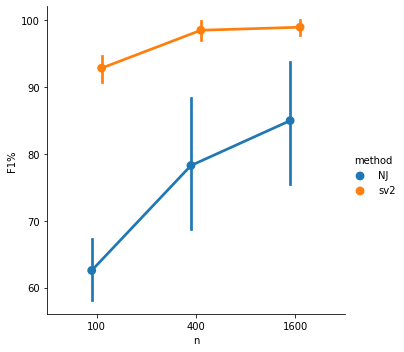

In [169]:
dodge = 0.1*(df['method'].nunique() - 1)
sns.catplot(data=df, x="n", y="F1%", kind="point", hue="method", col=None, col_wrap=None, dodge=dodge)

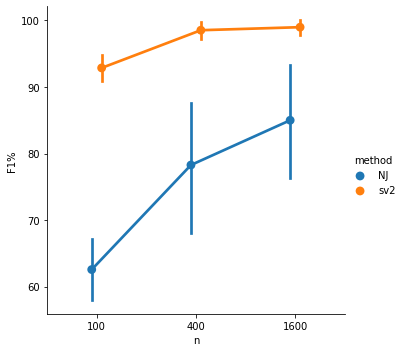

In [174]:
accuracy(df)

In [120]:
import pandas as pd
ss = pd.Series([1.00001, 1.01, 4, "hi"])
ss.round(2)

TypeError: can't multiply sequence by non-int of type 'float'